# Input: Normalized gene counts exported from DESeq2 for clone 1 and clone 2 HBEC3kts. 
## To investigate differences in phenotype and gene expression patterns in HBEC3kts, plot KRAS and U2AF1 normalized counts for each genotype and clone.

In [1]:
#import modules
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import pandas as pd 
import numpy as np 
import scipy
import scikit_posthocs
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import matplotlib.transforms as mtransforms
matplotlib.rcParams['pdf.fonttype'] = 42
import statannot

# create dataframes from DESeq2 exported values

In [2]:
#Normalized KRAS and U2AF1 counts for clone 1
clone1_df = pd.DataFrame.from_dict({ 
    "Genotype" : ['U2AF1WT + LACZ', 'U2AF1WT + LACZ', 'U2AF1WT + LACZ', 
                  "U2AF1S34F + LACZ", "U2AF1S34F + LACZ", "U2AF1S34F + LACZ", 
                 "U2AF1WT + KRASG12V", "U2AF1WT + KRASG12V", "U2AF1WT + KRASG12V", 
                 'U2AF1S34F + KRASG12V', 'U2AF1S34F + KRASG12V', 'U2AF1S34F + KRASG12V'],
    'KRAS': [2133.648, 2172.193, 2745.644,
            2407.533, 2733.079, 2659.202,
            4134.523, 4658.535, 4083.501,
            2286.518, 6489.676, 4176.359],
    
    'U2AF1': [4056.279, 4774.501, 4040.362,
             5352.206, 4726.805, 5830.957,
             5782.352, 5747.551, 4811.913,
             4849.248, 4692.751, 4168.776]
    })

#Normalized KRAS and U2AF1 counts for clone 2
clone2_df = pd.DataFrame.from_dict({ 
    "Genotype" : ['U2AF1WT + LACZ', 'U2AF1WT + LACZ', 'U2AF1WT + LACZ', 
                  "U2AF1S34F + LACZ", "U2AF1S34F + LACZ", "U2AF1S34F + LACZ", 
                 "U2AF1WT + KRASG12V", "U2AF1WT + KRASG12V", "U2AF1WT + KRASG12V", 
                 'U2AF1S34F + KRASG12V', 'U2AF1S34F + KRASG12V', 'U2AF1S34F + KRASG12V'],
    'KRAS': [2799.257, 3112.987, 2814.498,
            2838.040, 2339.998, 3142.907,
            5782.352, 5747.551, 4811.913,
            4849.248, 4692.751, 4168.776],
    
    'U2AF1': [4032.719, 4060.796, 3940.306,
             4185.008, 4323.409, 4383.263,
             4000.473, 4119.728, 4167.147,
             2942.727, 2843.430, 2729.731]
    })

clone1_df

,Genotype,KRAS,U2AF1
0,U2AF1WT + LACZ,2133.648,4056.279
1,U2AF1WT + LACZ,2172.193,4774.501
2,U2AF1WT + LACZ,2745.644,4040.362
3,U2AF1S34F + LACZ,2407.533,5352.206
4,U2AF1S34F + LACZ,2733.079,4726.805
5,U2AF1S34F + LACZ,2659.202,5830.957
6,U2AF1WT + KRASG12V,4134.523,5782.352
7,U2AF1WT + KRASG12V,4658.535,5747.551
8,U2AF1WT + KRASG12V,4083.501,4811.913
9,U2AF1S34F + KRASG12V,2286.518,4849.248


/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1383/856942065.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels, rotation=45)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1383/856942065.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels, rotation=45)


[Text(0, 0, 'U2AF1WT + LACZ'),
 Text(1, 0, 'U2AF1S34F + LACZ'),
 Text(2, 0, 'U2AF1WT + KRASG12V'),
 Text(3, 0, 'U2AF1S34F + KRASG12V')]

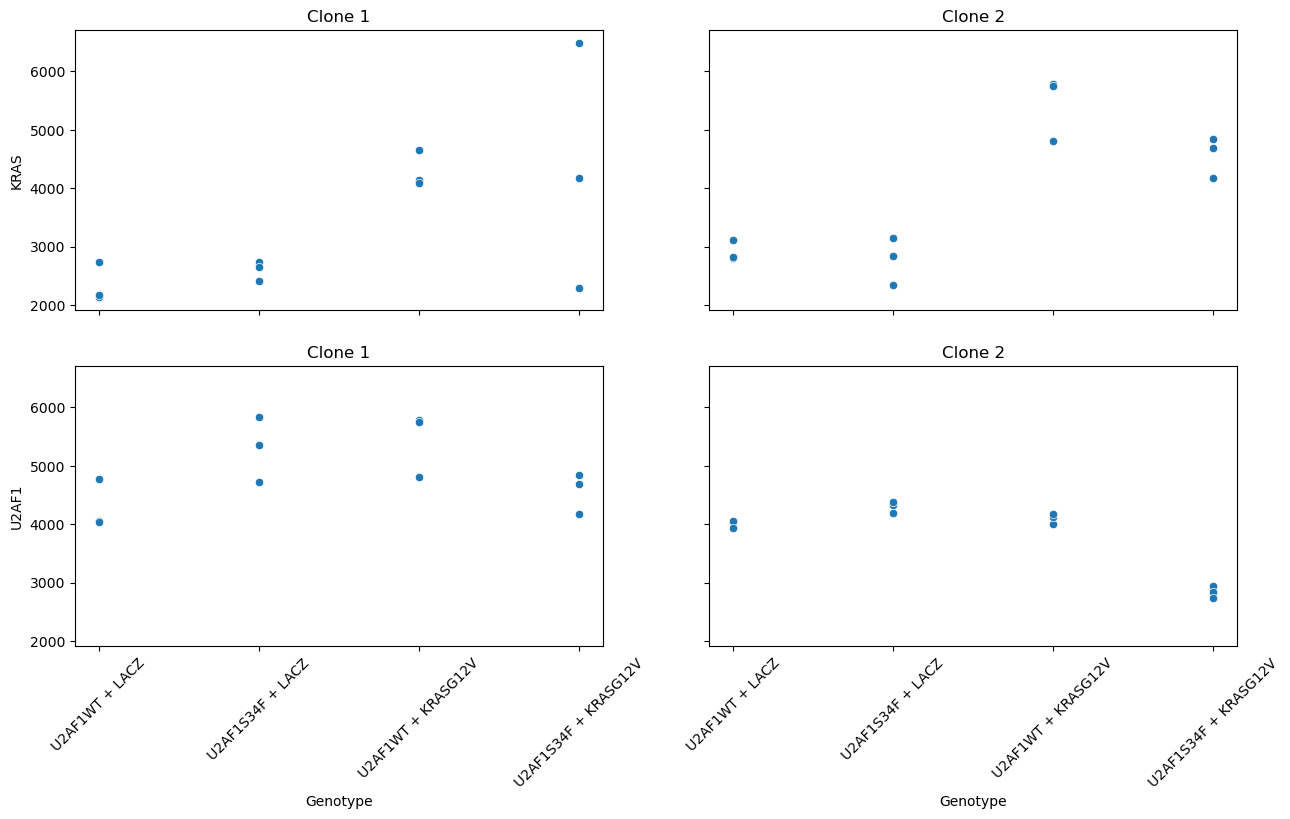

In [3]:
#plot normalized gene counts 

fig, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(15,8))

ax1=sns.scatterplot(data=clone1_df, x='Genotype', y='KRAS', ax=ax[0,0])
ax2=sns.scatterplot(data=clone2_df, x='Genotype', y='KRAS', ax=ax[0,1])
ax3=sns.scatterplot(data=clone1_df, x='Genotype', y='U2AF1', ax=ax[1,0])
ax4=sns.scatterplot(data=clone2_df, x='Genotype', y='U2AF1', ax=ax[1,1])

ax1.set_title('Clone 1')
ax3.set_title('Clone 1')

ax2.set_title('Clone 2')
ax4.set_title('Clone 2')

labels=['U2AF1WT + LACZ', 'U2AF1S34F + LACZ', 'U2AF1WT + KRASG12V', 
        'U2AF1S34F + KRASG12V']

ax3.set_xticklabels(labels, rotation=45)
ax4.set_xticklabels(labels, rotation=45)

# Perform statistics for genotypes with significant differences in U2AF1 or KRAS gene expression in clone 1 and clone 2

In [4]:
#clone 1 KRAS statistics
df=sp.posthoc_dunn(clone1_df, val_col='KRAS',
                group_col='Genotype', p_adjust = 'bonferroni',sort=True)

df.round(5)

,U2AF1S34F + KRASG12V,U2AF1S34F + LACZ,U2AF1WT + KRASG12V,U2AF1WT + LACZ
U2AF1S34F + KRASG12V,1.00000,1.00000,1.00000,0.53658
U2AF1S34F + LACZ,1.00000,1.00000,0.84619,1.00000
U2AF1WT + KRASG12V,1.00000,0.84619,1.00000,0.24924
U2AF1WT + LACZ,0.53658,1.00000,0.24924,1.00000


In [21]:
#clone 1 U2AF1 statistics
df=sp.posthoc_dunn(clone1_df, val_col='U2AF1',
                group_col='Genotype', p_adjust = 'bonferroni',sort=True)

df.round(5)

,U2AF1S34F + KRASG12V,U2AF1S34F + LACZ,U2AF1WT + KRASG12V,U2AF1WT + LACZ
U2AF1S34F + KRASG12V,1.00000,1.00000,0.84619,1.00000
U2AF1S34F + LACZ,1.00000,1.00000,1.00000,0.32547
U2AF1WT + KRASG12V,0.84619,1.00000,1.00000,0.18870
U2AF1WT + LACZ,1.00000,0.32547,0.18870,1.00000


In [22]:
# clone 2 U2AF1 statistics
df=sp.posthoc_dunn(clone2_df, val_col='U2AF1',
                group_col='Genotype', p_adjust = 'bonferroni',sort=True)

df.round(5)

,U2AF1S34F + KRASG12V,U2AF1S34F + LACZ,U2AF1WT + KRASG12V,U2AF1WT + LACZ
U2AF1S34F + KRASG12V,1.00000,0.01341,0.42025,1.00000
U2AF1S34F + LACZ,0.01341,1.00000,1.00000,0.42025
U2AF1WT + KRASG12V,0.42025,1.00000,1.00000,1.00000
U2AF1WT + LACZ,1.00000,0.42025,1.00000,1.00000


In [23]:
# clone 2 KRAS statistics
df=sp.posthoc_dunn(clone2_df, val_col='KRAS',
                group_col='Genotype', p_adjust = 'bonferroni',sort=True)

df.round(5)

,U2AF1S34F + KRASG12V,U2AF1S34F + LACZ,U2AF1WT + KRASG12V,U2AF1WT + LACZ
U2AF1S34F + KRASG12V,1.00000,0.67754,1.00000,0.53658
U2AF1S34F + LACZ,0.67754,1.00000,0.10450,1.00000
U2AF1WT + KRASG12V,1.00000,0.10450,1.00000,0.07643
U2AF1WT + LACZ,0.53658,1.00000,0.07643,1.00000


# Conclusions: Only clone 2 U2AF1 S34F + KRAS G12V exhibits significant suppression of U2AF1 expression compared to U2AF1 S34F + LACZ